## Практическое задание

  1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston. 
  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

  3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

  1-2. (*)  Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews .Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?


In [125]:
from sklearn.datasets import load_boston

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from seaborn import pairplot

from tensorflow import linspace
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [77]:
feature_names = load_boston()['feature_names']
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [78]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [79]:
feature_names = load_boston()['feature_names']
X, y = load_boston(return_X_y=True)
X = pd.DataFrame(X, columns=feature_names)

In [80]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [81]:
X.CHAS.value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [82]:
# X.RAD.value_counts()

In [83]:
X = pd.get_dummies(X, columns=['CHAS'], prefix='', prefix_sep='')

In [84]:
X.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,0.0,1.0
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,1,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,1,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,1,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,1,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,1,0


In [85]:
# cont_feature_names = np.delete(feature_names, [3, 8])
# cont_feature_names = np.append(cont_feature_names, ['Target'])
# cont_feature_names

In [86]:
target = load_boston()['target']
data = X.copy()
data['Target'] = target
data.head(2)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,0.0,1.0,Target
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,1,0,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,1,0,21.6


In [87]:
# X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=111)

In [88]:
train_dataset = data.sample(frac=0.8, random_state=111)
test_dataset = data.drop(train_dataset.index)

In [89]:
# pairplot(train_dataset[cont_feature_names], diag_kind='kde')

In [90]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,405.0,3.746424,8.692403,0.00632,0.08187,0.24522,3.67822,88.9762
ZN,405.0,11.916049,23.772053,0.00000,0.00000,0.00000,20.00000,100.0000
INDUS,405.0,11.015580,6.842772,0.46000,5.13000,9.69000,18.10000,27.7400
NOX,405.0,0.556308,0.120449,0.38500,0.44800,0.53800,0.63100,0.8710
RM,405.0,6.245657,0.707336,3.56100,5.87000,6.16700,6.59500,8.7250
AGE,405.0,68.168642,28.501279,2.90000,42.30000,77.80000,93.90000,100.0000
DIS,405.0,3.833297,2.169948,1.12960,2.04590,3.27210,5.28730,12.1265
RAD,405.0,9.533333,8.730679,1.00000,4.00000,5.00000,24.00000,24.0000
TAX,405.0,407.024691,169.163330,187.00000,279.00000,330.00000,666.00000,711.0000
PTRATIO,405.0,18.441481,2.161753,12.60000,17.00000,19.10000,20.20000,22.0000


In [91]:
train_features = train_dataset[train_dataset.columns].copy()
test_features = test_dataset[train_dataset.columns].copy()

train_labels = train_features.pop('Target')
test_labels = test_features.pop('Target')

In [92]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
CRIM,3.746424,8.692403
ZN,11.916049,23.772053
INDUS,11.015580,6.842772
NOX,0.556308,0.120449
RM,6.245657,0.707336
AGE,68.168642,28.501279
DIS,3.833297,2.169948
RAD,9.533333,8.730679
TAX,407.024691,169.163330
PTRATIO,18.441481,2.161753


In [93]:
normalizer = preprocessing.Normalization(axis=-1)

In [94]:
normalizer.adapt(np.array(train_features))

In [95]:
print(normalizer.mean.numpy())

[3.7464242e+00 1.1916048e+01 1.1015580e+01 5.5630761e-01 6.2456560e+00
 6.8168640e+01 3.8332965e+00 9.5333338e+00 4.0702472e+02 1.8441483e+01
 3.5599091e+02 1.2857385e+01 9.3827152e-01 6.1728392e-02]


In [96]:
# first = np.array(train_features[:1])

# with np.printoptions(precision=2, suppress=True):
#   print('First example:', first)
#   print()
#   print('Normalized:', normalizer(first).numpy())

### Линейная модель с одним признаком (LSTAT)

In [97]:
lstat = np.array(train_features['LSTAT'])

lstat_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)
lstat_normalizer.adapt(lstat)

In [98]:
# model = Sequential([
#     Dense( 512, activation='relu', input_shape=(784,)),
#     Dense(512, activation='linear'),
#     Dense(10, activation='softmax')
# ])

# model.compile(optimizer='adam',
#                      loss='categorical_crossentropy',
#                      metrics=['accuracy'])

# model.summary()

In [99]:
lstat_model = Sequential([
    lstat_normalizer,
    layers.Dense(units=1)
])

lstat_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_4 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [100]:
lstat_model.predict(lstat[:10])

array([[ 0.33890194],
       [ 0.26803592],
       [ 0.43525934],
       [-0.25861606],
       [ 0.46126056],
       [ 0.35062796],
       [ 0.40823853],
       [-0.1755141 ],
       [ 0.06206552],
       [-0.26473394]], dtype=float32)

In [101]:
lstat_model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mse'])

In [102]:
%%time
history = lstat_model.fit(
    train_features['LSTAT'], train_labels,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

CPU times: user 2.34 s, sys: 101 ms, total: 2.44 s
Wall time: 1.97 s


In [103]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mse,val_loss,val_mse,epoch
95,21.811108,556.199280,19.025080,424.101410,95
96,21.799965,555.679138,19.014597,423.669189,96
97,21.788788,555.158203,19.004271,423.233032,97
98,21.777679,554.621887,18.993948,422.797028,98
99,21.766619,554.112976,18.983219,422.372009,99


In [104]:
def plot_loss(history):
    plt.figure(figsize=(15, 10))
#     plt.plot(history.history['loss'], label='loss')
#     plt.plot(history.history['val_loss'], label='val_loss')
    plt.plot(history.history['mse'], label='mse')
    plt.plot(history.history['val_mse'], label='val_mse')
#     plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [LSTAT]')
    plt.legend()
    plt.grid(True)

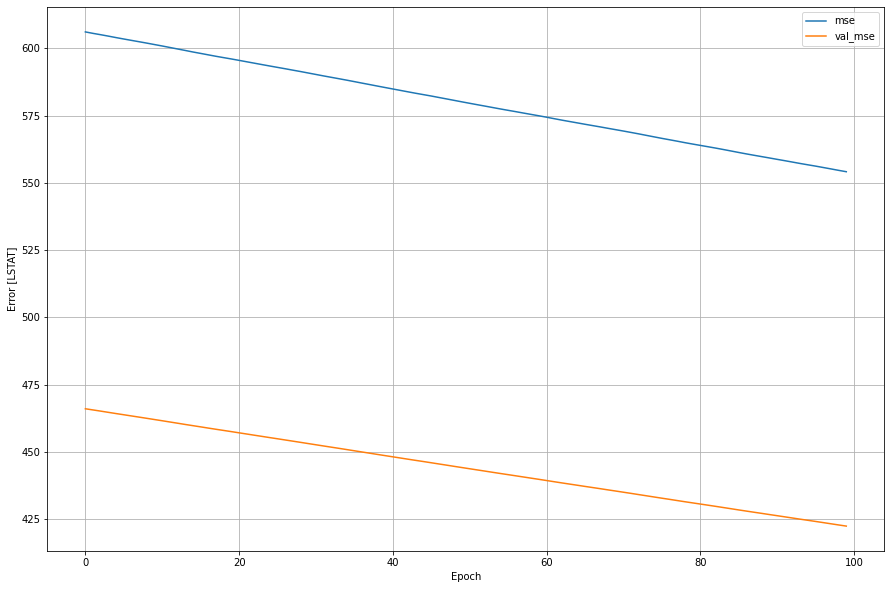

In [105]:
plot_loss(history)

In [106]:
test_results = {}

test_results['lstat_model'] = lstat_model.evaluate(
    test_features['LSTAT'],
    test_labels, verbose=0)

In [107]:
x = linspace(0.0, 40, 251)
y = lstat_model.predict(x)

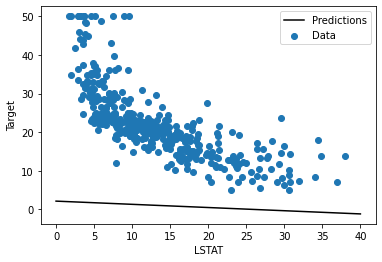

In [108]:
plt.scatter(train_features['LSTAT'], train_labels, label='Data')
plt.plot(x, y, color='k', label='Predictions')
plt.xlabel('LSTAT')
plt.ylabel('Target')
plt.legend()

### Линейная модель с полным набором признаков

In [109]:
linear_model = Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [110]:
linear_model.predict(train_features[:10])

array([[-0.21068645],
       [ 0.39233205],
       [ 1.3756939 ],
       [-1.1887281 ],
       [ 1.1401882 ],
       [ 0.08769894],
       [ 0.11843988],
       [ 0.82482743],
       [-1.0252758 ],
       [-0.02919912]], dtype=float32)

In [111]:
linear_model.layers[1].kernel

<tf.Variable 'dense_10/kernel:0' shape=(14, 1) dtype=float32, numpy=
array([[-0.29764995],
       [ 0.23242491],
       [-0.55343974],
       [-0.2352427 ],
       [ 0.0340414 ],
       [ 0.30320126],
       [ 0.05889553],
       [-0.47125453],
       [ 0.40007335],
       [ 0.3331982 ],
       [-0.31820762],
       [-0.22467992],
       [-0.04057646],
       [-0.3313248 ]], dtype=float32)>

In [112]:
linear_model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mse'])

In [113]:
%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    verbose=0,
    validation_split = 0.2)

CPU times: user 2.36 s, sys: 76.4 ms, total: 2.43 s
Wall time: 1.95 s


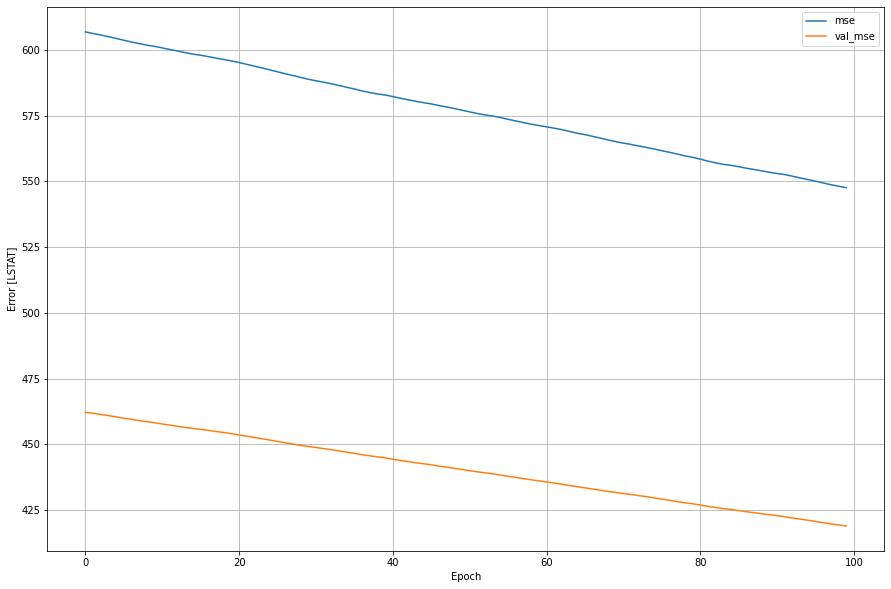

In [114]:
plot_loss(history)

In [115]:
x = linspace(0.0, 40, 251)
y = linear_model.predict(x)

In [117]:
test_results['linear_model'] = linear_model.evaluate(test_features, test_labels, verbose=0)

### Модель со скрытыми слоями и одним признаком (LSTAT)

In [118]:
def build_and_compile_model(norm):
    model = Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1, activation='linear')
    ])

    model.compile(
        optimizer='adam',
        loss='mean_absolute_error',
        metrics=['mse'])
    return model

In [119]:
dnn_lstat_model = build_and_compile_model(lstat_normalizer)

In [120]:
dnn_lstat_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_4 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [121]:
%%time
history = dnn_lstat_model.fit(
    train_features['LSTAT'], train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 2.68 s, sys: 134 ms, total: 2.82 s
Wall time: 2.15 s


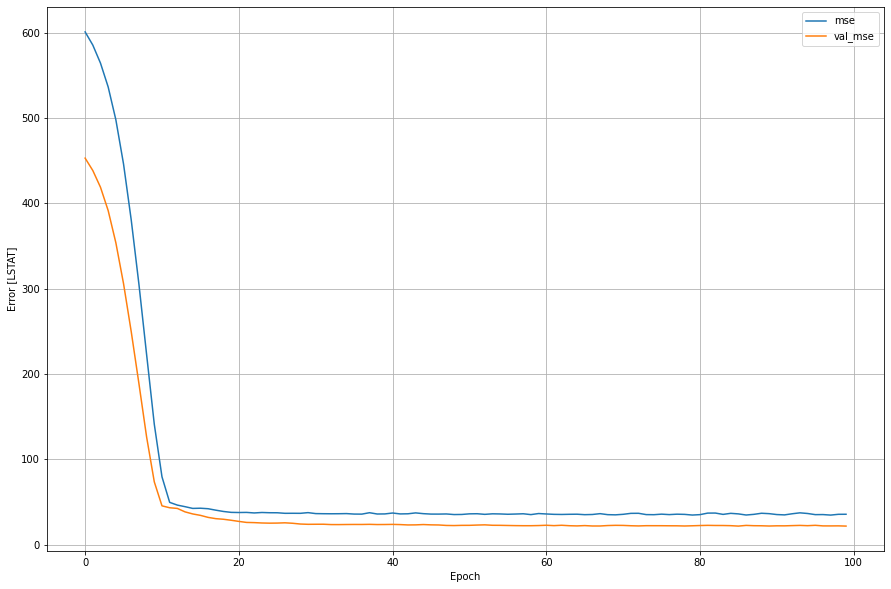

In [122]:
plot_loss(history)

In [123]:
x = linspace(0.0, 40, 251)
y = dnn_lstat_model.predict(x)

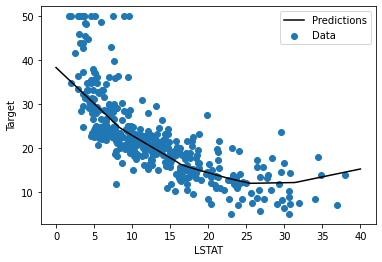

In [126]:
plt.scatter(train_features['LSTAT'], train_labels, label='Data')
plt.plot(x, y, color='k', label='Predictions')
plt.xlabel('LSTAT')
plt.ylabel('Target')
plt.legend()

In [133]:
test_results['dnn_lstat_model'] = dnn_lstat_model.evaluate(
    test_features['LSTAT'], test_labels,
    verbose=0)

### Модель со скрытыми слоями и полным набором признаков

In [134]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_3 (Normalizati (None, 14)                29        
_________________________________________________________________
dense_17 (Dense)             (None, 64)                960       
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 65        
Total params: 5,214
Trainable params: 5,185
Non-trainable params: 29
_________________________________________________________________


In [135]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 2.74 s, sys: 160 ms, total: 2.9 s
Wall time: 2.19 s


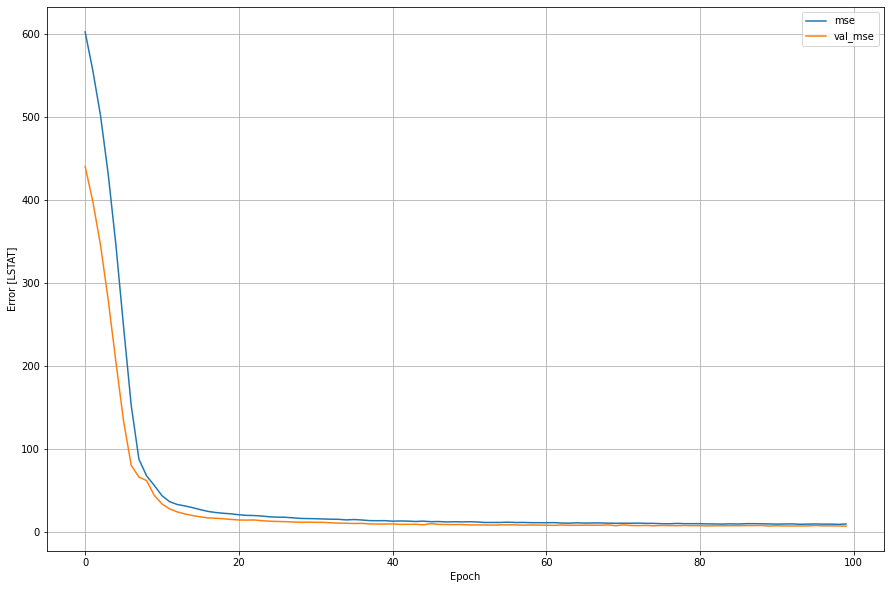

In [136]:
plot_loss(history)

In [137]:
x = linspace(0.0, 40, 251)
y = dnn_model.predict(x)

In [138]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

### Выведем результаты

In [139]:
pd.DataFrame(test_results, index=['MAE', 'MSE']).T

,MAE,MSE
lstat_model,22.262852,567.022461
linear_model,22.287436,562.734558
dnn_lstat_model,3.938641,30.309872
dnn_model,2.866383,20.633736


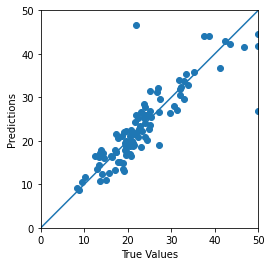

In [140]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

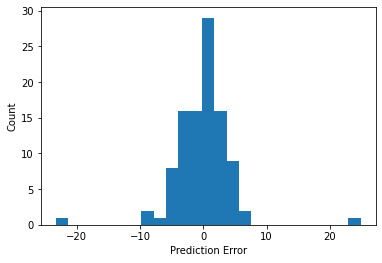

In [141]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

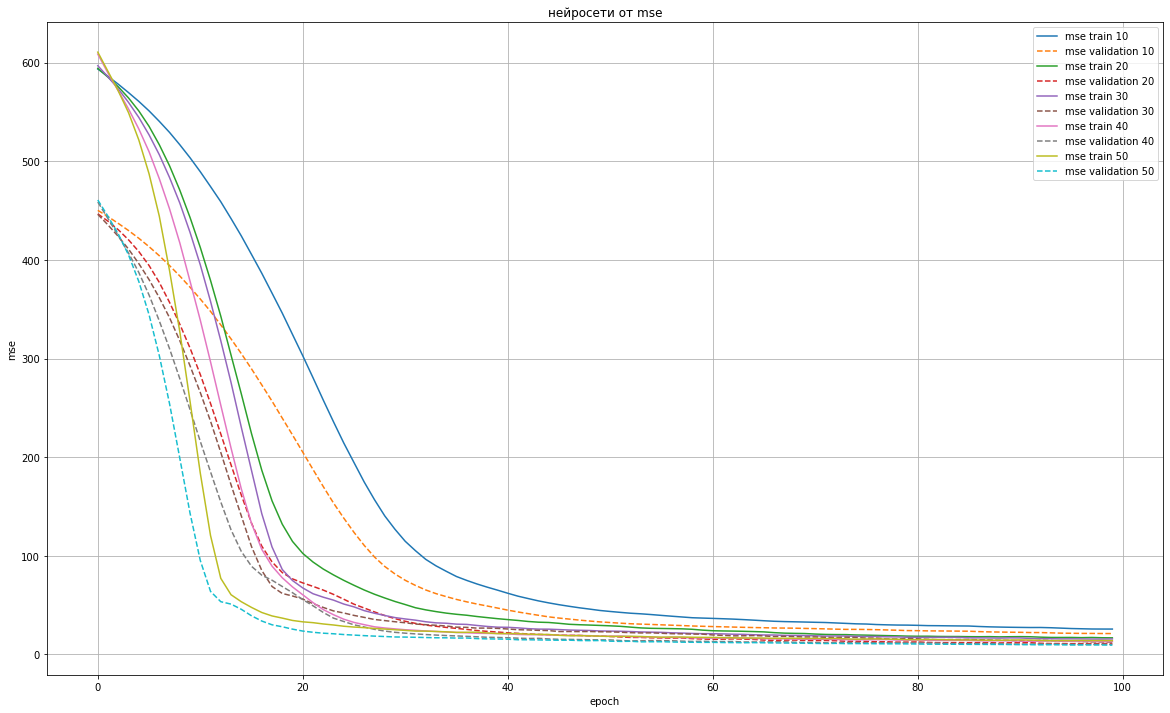

In [145]:
neuron_numb = [10, 20, 30, 40, 50]
test_results = {}

plt.figure(figsize=(20,12))

for n in neuron_numb:
    name=f'{n}_model'
    model = Sequential([
      normalizer,
      layers.Dense(n / 2, activation='relu'),
      layers.Dense(n / 2, activation='relu'),
      layers.Dense(1, activation='linear')
    ])

    model.compile(
        optimizer='adam',
        loss='mean_absolute_error',
        metrics=['mse'])
 
    model_history = model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

    plt.plot(model_history.history['mse'], '-', label = f'mse train {n}')
    plt.plot(model_history.history['val_mse'], '--', label = f'mse validation {n}')
    
    test_results[name] = model.evaluate(test_features, test_labels, verbose=0)
        
plt.legend()
plt.grid('On')
plt.title('нейросети от mse')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.show()

In [ ]:
neuron_numb = 30
layers_numb = [2, 3, 5, 10]
plt.figure(figsize=(20,12))
for layers in layers_numb:
    model_l = Sequential(name=f'{layers}_layer_model')
    model_l.add(Dense(128, activation='relu', input_shape=(784,)))  

    for k in range(layers-1):
        model_l.add(Dense(neuron_numb / (layers-1), activation='tanh')) 

    model_l.add(Dense(10, activation='softmax'))
    
    if layers == 3:
        model_l.save_weights('model.l3') # сохраним для задания №2
#         print(model_l.summary())

    model_l.compile(
        optimizer='adam',
        loss=keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy'],
    ) 
    model_l_history = model_l.fit(
        train_images[:,:],
        y_t[:,:],
        epochs=15,
        batch_size=32,
        validation_split=0.2,
        verbose=0
    )
    
    plt.plot(model_l_history.history['accuracy'], '-', label = f'accuracy train {layers}-слойная модель')
    plt.plot(model_l_history.history['val_accuracy'], '--', label = f'accuracy validation {layers}-слойная модель')
        
plt.legend()
plt.grid('On')
plt.title('нейросети от accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
plt.figure(figsize=(20,12))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs+1)

for i_optim in [keras.optimizers.SGD(), keras.optimizers.RMSprop(), keras.optimizers.Adam(), keras.optimizers.Nadam()]:
  # создаем рабочую модель modeli куда будем загружать веса из предыдущего задания. Параметры сети - 3 слоя (2 скрытых по 15 нейронов)
    modeli = Sequential(name=f'{i_optim.get_config()["name"]}_layer_model')
    modeli.add(Dense(128, activation='relu', input_shape=(784,)))  

    for k in range(2):
        modeli.add(Dense(15, activation='tanh')) 

    modeli.add(Dense(10, activation='softmax'))
#     print(modeli.summary())
    
  # загружаем веса modeli.load_weights('model.h5')
    modeli.load_weights('model.l3')

  # компилируем modeli с одним из оптимизаторов
    modeli.compile(
        optimizer=i_optim,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )

    modeli_history = modeli.fit(
                  train_images,
                  to_categorical(train_labels),
                  epochs=epochs,
                  batch_size=32, validation_split=0.2, verbose = 0
                  )

    plt.plot(modeli_history.history['accuracy'], '-', label = f'accuracy train с {modeli.optimizer.get_config()["name"]}')
    plt.plot(modeli_history.history['val_accuracy'], '--', label = f'accuracy validation {modeli.optimizer.get_config()["name"]}')
     
plt.legend()
plt.grid('On')
plt.title('нейросети от accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()